   #                              Refugees and Asylum Scenario in USA
	
Every year thousands and thousands legally defined refugees either apply for asylum from inside the USA or apply for refugees status outside the USA. The United Nations’ statistics  state that by 2015, around 46.6 million people out of 244 million people migrants  living in the United State of America were not born there. This means, nearly 19% international migrants  live in the USA. In this project, I want to concentrate on refugee arrivals by region and country of nationality, individuals granted asylum affirmatively or defensively, individuals granted asylum defensively by region and country of nationality, and refugee arrivals by relationship to principal applicant and sex, age, and marital status during the period of year. The goal of the project is to represent the  scenario of  refugees and asylees from different area of region.


The data sets gathered  from https://www.dhs.gov/immigration-statistics/refugees-asylees. This data set is provided by Homeland security USA .The data includes a significant number of NA, and unusual sign in the data files ,while it is possible to replace the NA, and unusual sign with column, or even zero if desired. 

The main objective of the project is to learn the application of Python language on practical data manipulation, visualization and statistical analysis. In this project ,I am planning to do exploratory data analysis, and  analyze the temporal trend of both asylees and refugees in the USA by using pandas,matplotlib,ggplot library in python.



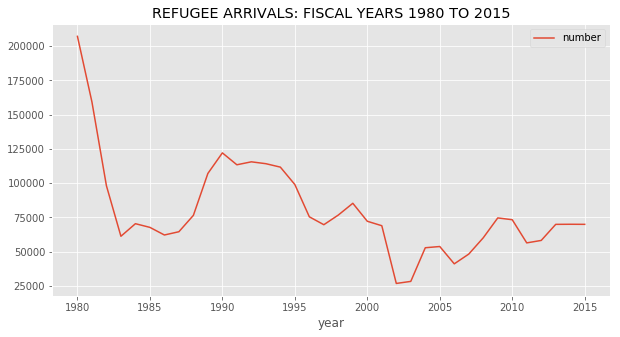

In [242]:
import os
p=os.chdir('/Users/iburrahman/Desktop/m/YRBK 2015 RFA Excel Final 2')
cwd=os.getcwd()
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#REFUGEE ARRIVALS: FISCAL YEARS 1980 TO 2015
table_13=pd.read_csv('fy2015_table13.csv',header=None)
table_13.columns=['year','number']
table_13=table_13.drop([0])
cols=['number']
table_13[cols] = table_13[cols].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',',''), errors='corece'))
table_13= table_13.apply(pd.to_numeric, errors='ignore')
abc=table_13.set_index('year')
abc.plot(kind='line', title ="REFUGEE ARRIVALS: FISCAL YEARS 1980 TO 2015", figsize=(10,5), legend=True, fontsize=10)
plt.show()

###### The ﬁgure depicts the overall trend of refuge from the year 1980 to year 2015 from all over the world to USA. Year 1980 has the highest and 2003 has the lowest number of refuge

### The following csv file is about refugee came to USA from different Region and country of nationality

In [243]:
ab=pd.read_csv('fy2015_table14d.csv',header=None)
ab[:10]
ab1=ab.replace('D','')
ab1[:10]
cols = [1,2,3,4,5,6,7,8,9,10]
#f ‘coerce’,then invalid parsing will be set as NaN
ab1[cols] = ab1[cols].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',',''), errors='corece'))
ab1=ab1.fillna('')
ab1.columns = ['REGION','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
#REFUGEE ARRIVALS BY REGION AND COUNTRY OF NATIONALITY
ab1=ab1.drop([0,1,2,10,7])
ab21=DataFrame(ab1)
ab23=ab21.apply(pd.to_numeric, errors='ignore')
ab24 = ab23.set_index('REGION')
ab25= ab24.apply(pd.to_numeric, errors='corece')
ab24["Number of Refugee"] = ab24.sum(axis=1)
ab24["Number of Refugee"]=ab24["Number of Refugee"].astype(int)
ab2=ab24['Number of Refugee']
ab2=DataFrame(ab2)
ab4=ab2[:5]
ab5=ab2[7:]
ab3=ab4.sort_values('Number of Refugee',ascending=False)[:5]
ab3=ab3.sort_values('Number of Refugee',ascending=True)[:5]
ab6= ab5.sort_values(['Number of Refugee'], ascending=False)
ab7= ab5.sort_values(['Number of Refugee'], ascending=True)
ab8=ab7[:10]


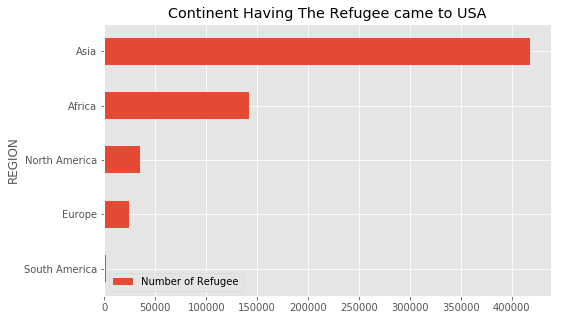

In [244]:
ax1 = ab3.plot(kind='barh', stacked=False, title ="Continent Having The Refugee came to USA",figsize=(8,5), legend=True, fontsize=10)
plt.show()

####  Most of the people came to USA as a refugee from Aisa ,whereas a very few number of refugee came from South America

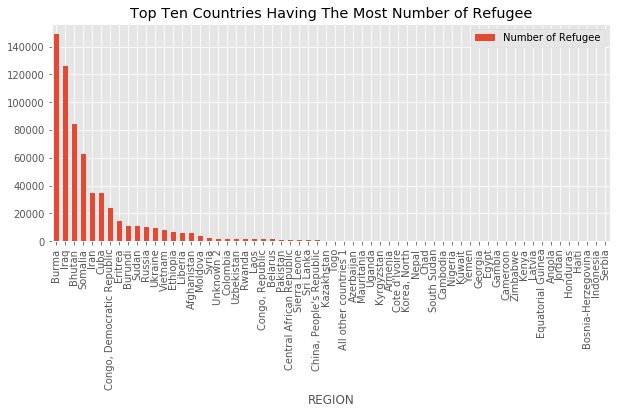

In [245]:
ab6.plot(kind='bar', title ="Top Ten Countries Having The Most Number of Refugee", figsize=(10,4), legend=True, fontsize=10)
plt.show()

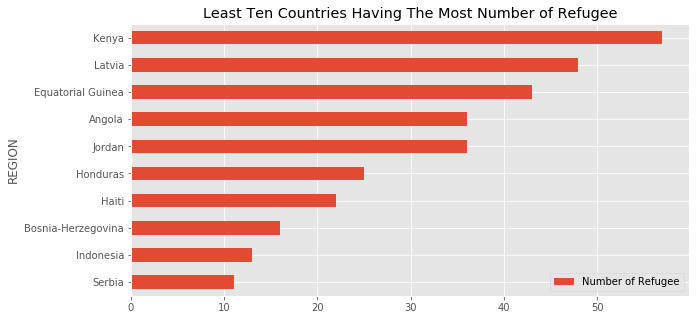

In [246]:
ab8.plot(kind='barh', title ="Least Ten Countries Having The Most Number of Refugee", figsize=(10,5), legend=True, fontsize=10)
plt.show()

####  From the above two plots ,Burma has the highest number of refuge with the cumulative total of 148957,where Serbia was the lowest only 11 people  throughout the year

### REFUGEE ARRIVALS BY RELATIONSHIP TO PRINCIPAL APPLICANT AND SEX, AGE, AND MARITAL STATUS: FISCAL YEAR 2015.

#### This file is about refugee applicant with the relationship,for example principal aplicant with his or her spouse,or children.

In [247]:
table_15=pd.read_csv('fy2015_table15d.csv',header=None)
cols = [1,2,3,4]
#f ‘coerce’,then invalid parsing will be set as NaN
table_15[cols] = table_15[cols].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',',''), errors='coerce'))
table_15=table_15.fillna('')
#table_15.xs(4)[2,3,4]='Principal applicants','Dependents','Dependents'
table_15.xs(5)[3,4]='Spouses','Children'
df1=table_15.drop([0,1,2,3,4,5])
df1.columns=['SEX','Total','Principal applicants','Dependent1_spouse','Dependent2_children']
d=df1[:3]
d=d.drop(6)
d=d.set_index('SEX')
df15=df1[6:22]
df16=df15.set_index('SEX')['Principal applicants']
dat=DataFrame(df16)
dat3=dat.sort_values(['Principal applicants'], ascending=True)

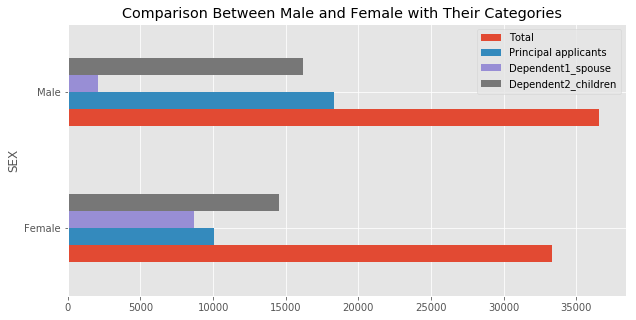

In [248]:
d.plot(kind='barh', title ="Comparison Between Male and Female with Their Categories  ", figsize=(10,5), legend=True, fontsize=10)
plt.show()

#### Ovserving this plot it seems to me that both for the  male and female categories , Male people are much more higher than the female as a refuge applicant,thogh the children are similar to the male people.

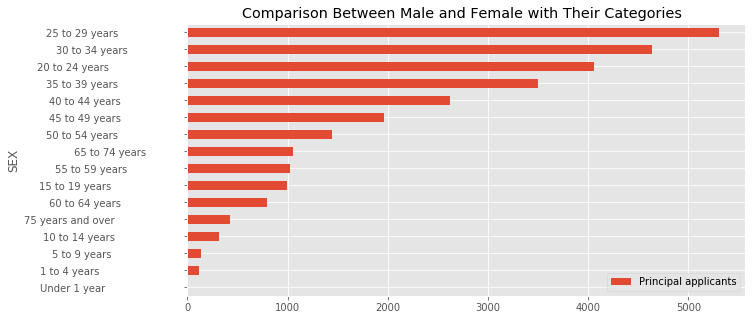

In [249]:
dat3.plot(kind='barh', title ="Comparison Between Male and Female with Their Categories  ", figsize=(10,5), legend=True, fontsize=10)
plt.show()

#### Majority of the application under 39 years old.The higest number of applicant are between 25 and 29 years old,where 1 to 4 years was the lowest.No applicant under 1 year old baby.

### INDIVIDUALS GRANTED ASYLUM AFFIRMATIVELY OR DEFENSIVELY: FISCAL YEARS 1990 TO 2015
#### Two kind of application granted for refugee . Some application is granted with directly is called affirmatively.On the other hand,some are refused then defeneded and later granted is called difensively granted.

In [250]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
table_16=pd.read_csv('fy2015_table16.csv',header=None)
cols = [1,2,3]
#f ‘coerce’,then invalid parsing will be set as NaN
table_16[cols] = table_16[cols].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',',''), errors='corece'))
table_16=table_16.fillna('')
table_16=table_16.drop([0,1,2,3,30])
table_16.columns=['year','Total','Affirmative','Defensive']
table_16=table_16.set_index('year')
p=table_16[['Affirmative','Defensive']]

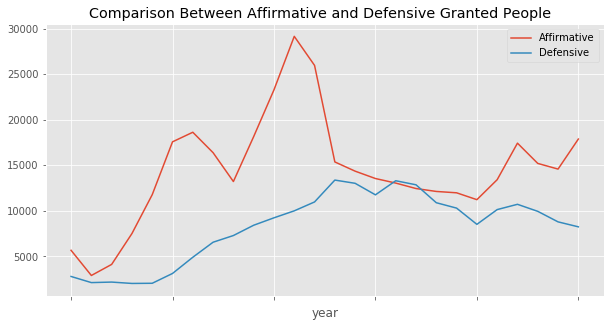

In [251]:
p.plot(kind='line', title ="Comparison Between Affirmative and Defensive Granted People  ", figsize=(10,5), legend=True, fontsize=10)
plt.show()

#### Most of the year affirmative applicant were more granted than defensive applicant throughout the whole period of the year.

### THE FOLLOWING FILE INDIVIDUALS GRANTED ASYLUM AFFIRMATIVELY  COUNTRY OF NATIONALITY: FISCAL YEARS 2006 TO 2015

In [255]:
table_14=pd.read_csv('fy2015_table17d.csv',header=None)
table_14[:10]
dat=table_14.replace('D','')
dat[:10]
cols = [1,2,3,4,5,6,7,8,9,10]
#f ‘coerce’,then invalid parsing will be set as NaN
dat[cols] = dat[cols].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',',''), errors='corece'))
dat=dat.fillna('')
dat.columns = ['REGION','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
#REFUGEE ARRIVALS BY REGION AND COUNTRY OF NATIONALITY
clean_table_14=dat.drop([0,1,2,10,7])
df1=DataFrame(clean_table_14)
df10=df1.drop([3,5,4,13,12,14,114,115])
df10=df10.set_index('REGION')
df31=df10.apply(pd.to_numeric, errors='ignore')
df31["Total number of Refugee"] = df31.sum(axis=1)
df32=df31
df32["Total number of Refugee"]=df32["Total number of Refugee"].astype(int)
q=df32.sort_values('Total number of Refugee',ascending=False)[:5]
q=q.sort_values('Total number of Refugee',ascending=True)[:5]
n=df32.sort_values('Total number of Refugee',ascending=True)[:5]
q=q["Total number of Refugee"]
n=n["Total number of Refugee"]


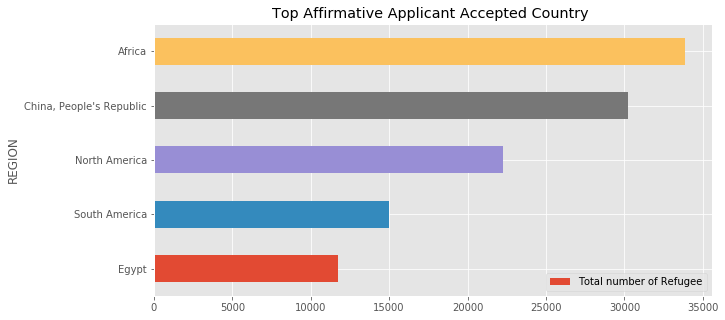

In [256]:
q.plot(kind='barh', title ="Top Affirmative Applicant Accepted Country " , figsize=(10,5), legend=True, fontsize=10)
plt.show()

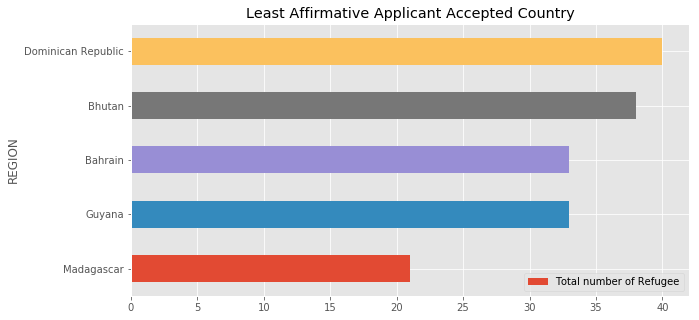

In [257]:
n.plot(kind='barh', title ="Least Affirmative Applicant Accepted Country", figsize=(10,5), legend=True, fontsize=10)
plt.show()

#### The above plots showed 5 higest and lowest affirmatively applicant granted countries . Africa was the highest ,and Madagascar wast the lowest.

### INDIVIDUALS GRANTED ASYLUM AFFIRMATIVELY BY RELATIONSHIP TO PRINCIPAL APPLICANT AND SEX, AGE, AND MARITAL STATUS: FISCAL YEAR 2015

In [265]:
table_18=pd.read_csv('fy2015_table18d.csv',header=None)
cols = [1,2,3,4]
#f ‘coerce’,then invalid parsing will be set as NaN
table_18[cols] = table_18[cols].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',',''), errors='coerce'))
table_18=table_18.fillna('')
#table_15.xs(4)[2,3,4]='Principal applicants','Dependents','Dependents'
table_18.xs(5)[3,4]='Spouses','Children'
df1=table_18.drop([0,1,2,3,4,5,32])
df1.columns=['SEX','Total','Principal applicants','Dependent1_spouse','Dependent2_children']
d=df1
d=d.drop(6)
d=d.set_index('SEX')

In [266]:
df15=df1[6:22]
df16=df15.set_index('SEX')['Principal applicants']
df1.columns=['SEX','Total','Principal applicants','Dependent1_spouse','Dependent2_children']
d=df1
d=d.set_index('SEX')
d = d.drop('Total', 1)
d[:10]
dt1=df1[23:].drop('Total',1)
dt22=dt1.set_index('SEX').drop('Total')
d222=dt22.apply(pd.to_numeric,errors='corece')
d222=d222[:3]

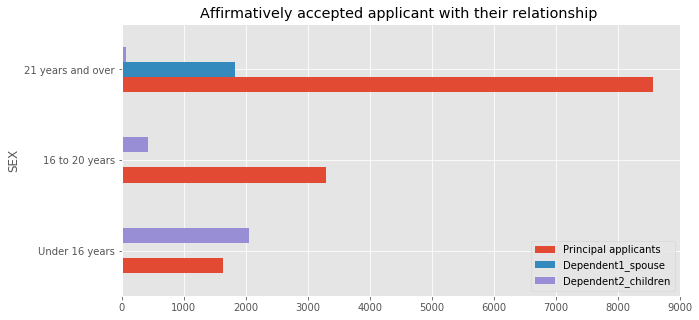

In [267]:
d222.plot(kind='barh', stacked=False, title ="Affirmatively accepted applicant with their relationship ", figsize=(10,5), legend=True, fontsize=10)
plt.show()

#### Majority of the application  were  21 and over years old .But,very few number of spouse and children are granted affirmatively compared with principal applicant. On the other hand, teneegers principal and children affirmatively applicant are around similarly accepted ,though there is no spouse accepted.  

### INDIVIDUALS GRANTED ASYLUM DEFENSIVELY BY  COUNTRY OF NATIONALITY: FISCAL YEARS 2006 TO 2015

In [271]:
table_14=pd.read_csv('fy2015_table19d.csv',header=None)
table_14[:10]
dat=table_14.replace('D','')
cols = [1,2,3,4,5,6,7,8,9,10]
#f ‘coerce’,then invalid parsing will be set as NaN
dat[cols] = dat[cols].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',',''), errors='corece'))
dat=dat.fillna('')
dat.columns = ['REGION','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
#REFUGEE ARRIVALS BY REGION AND COUNTRY OF NATIONALITY
clean_table_14=dat.drop([6,8,9,11,12,14,0,1,2,10,7,3,4,5,13,118,119,120,121,122,123,124,125,126])
clean_table_14[:10]
df21=DataFrame(clean_table_14)
df23=df21.apply(pd.to_numeric, errors='ignore')
df24 = df23.set_index('REGION')
df25= df24.apply(pd.to_numeric, errors='corece')
df24["Total number of Refugee"] = df24.sum(axis=1)
df24["Total number of Refugee"]=df24["Total number of Refugee"].astype(int)
data2=df24['Total number of Refugee']
data2=DataFrame(data2)
data4=data2
data5=data2[7:]
P=data4
Q=p.sort_values('Total number of Refugee',ascending=False)[:5]
Q=q.sort_values('Total number of Refugee',ascending=True)[:5]
N=p.sort_values('Total number of Refugee',ascending=True)[:5]

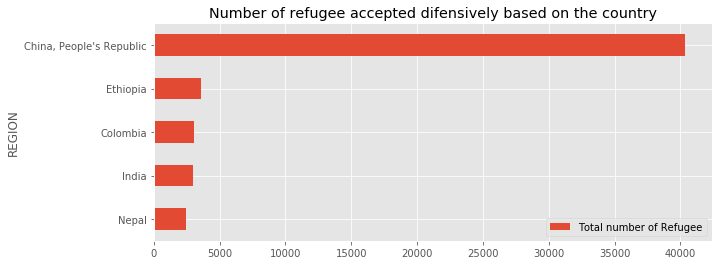

In [276]:
Q.plot(kind='barh', stacked=True,
                title ="Number of refugee accepted difensively based on the country", figsize=(10,4), legend=True, fontsize=10)
plt.show()

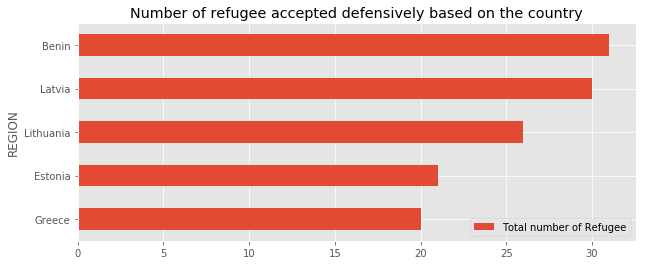

In [277]:
N.plot(kind='barh', stacked=True,
                title ="Number of refugee accepted defensively based on the country", figsize=(10,4), legend=True, fontsize=10)
plt.show()

#### The above plots showed 5 higest and lowest difensively applicant granted countries . China People's Republic was the highest ,and Grece wast the lowest.